In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [3]:
file_path = '../data/sierraleone-bumbuna.csv'

In [4]:
data= pd.read_csv(file_path)
df = pd.DataFrame(data)

In [5]:
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [6]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

Missing values in each column


In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


DataFrame information

In [10]:
print("\nDataFrame information:")
print(df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB

Drop the 'Comments' column

In [11]:
df = df.drop(columns=['Comments'])

print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


Count negative values

In [12]:
count_negative_ghi = (df['GHI'] < 0).sum()
count_negative_dni = (df['DNI'] < 0).sum()
count_negative_dhi = (df['DHI'] < 0).sum()
print(f"Number of negative GHI values: {count_negative_ghi}")
print(f"Number of negative DNI values: {count_negative_dni}")
print(f"Number of negative DHI values: {count_negative_dhi}")



Number of negative GHI values: 261135
Number of negative DNI values: 266352
Number of negative DHI values: 263128


Handling Negative Value

In [13]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


night_mask = (df['Timestamp'].dt.hour >= 20) | (df['Timestamp'].dt.hour < 6)


df.loc[night_mask, 'GHI'] = df.loc[night_mask, 'GHI'].clip(lower=0)
df.loc[night_mask, 'DNI'] = df.loc[night_mask, 'DNI'].clip(lower=0)
df.loc[night_mask, 'DHI'] = df.loc[night_mask, 'DHI'].clip(lower=0)


daytime_mask = ~night_mask


df.loc[daytime_mask, 'GHI'] = df.loc[daytime_mask, 'GHI'].apply(lambda x: abs(x) if x < 0 else x)
df.loc[daytime_mask, 'DNI'] = df.loc[daytime_mask, 'DNI'].apply(lambda x: abs(x) if x < 0 else x)
df.loc[daytime_mask, 'DHI'] = df.loc[daytime_mask, 'DHI'].apply(lambda x: abs(x) if x < 0 else x)


print(f"Remaining negative values in GHI: {(df['GHI'] < 0).sum()}")
print(f"Remaining negative values in DNI: {(df['DNI'] < 0).sum()}")
print(f"Remaining negative values in DHI: {(df['DHI'] < 0).sum()}")


Remaining negative values in GHI: 0
Remaining negative values in DNI: 0
Remaining negative values in DHI: 0


In [14]:
print(df.describe())

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     204.848424     116.568062   
min              2021-10-30 00:01:00       0.000000       0.000000   
25%              2022-01-29 06:00:45       0.000000       0.000000   
50%              2022-04-30 12:00:30       9.600000       0.200000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     296.489769     218.550419   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.732188     206.643095     198.114691      26.319394   
min         0.000000       0.000000       0.000000      12.300000   
25%         0.000000       0.000000       0.000000      23.100000   
50%         9.200000    

Detect Outliers

In [15]:


all_columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
               'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
               'Precipitation', 'TModA', 'TModB']


numeric_columns = [col for col in all_columns if pd.api.types.is_numeric_dtype(df[col])]


outlier_counts_z = {}
outlier_counts_iqr = {}


for column in numeric_columns:
    
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = (df[column] - mean) / std_dev
    outlier_counts_z[column] = (z_scores.abs() > 3).sum()  # Count of outliers based on Z-score

   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_counts_iqr[column] = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()  # Count of outliers based on IQR


outlier_summary = pd.DataFrame({
    'Column': numeric_columns,
    'Z-Score Outliers': [outlier_counts_z.get(col, 0) for col in numeric_columns],
    'IQR Outliers': [outlier_counts_iqr.get(col, 0) for col in numeric_columns]
})

print(outlier_summary)


           Column  Z-Score Outliers  IQR Outliers
0             GHI              2574         16684
1             DNI              7594        101770
2             DHI              3231          4842
3            ModA              1604         21017
4            ModB              2041         20613
5            Tamb               192           652
6              RH              4929         11865
7              WS              3967          3169
8          WSgust              3665          3665
9         WSstdev              2410           812
10             WD                 0             0
11        WDstdev              5140          4918
12             BP               977         17264
13       Cleaning               508           508
14  Precipitation              4067         12069
15          TModA               100           772
16          TModB                 4             9


Handle Outliers

In [16]:



print("Available columns in the DataFrame:")
print(df.columns)

all_columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
               'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
               'Precipitation', 'TModA', 'TModB']


numeric_columns = [col for col in all_columns if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]


columns_to_cap = [col for col in ['DNI', 'DHI', 'WS', 'WSgust', 'WSstdev', 'WDstdev', 'Precipitation'] if col in numeric_columns]

lower_cap = df[columns_to_cap].quantile(0.01)
upper_cap = df[columns_to_cap].quantile(0.99)

df[columns_to_cap] = df[columns_to_cap].clip(lower=lower_cap, upper=upper_cap, axis=1)
columns_to_impute = [col for col in ['WSstdev', 'BP', 'Cleaning', 'Precipitation'] if col in numeric_columns]


for column in columns_to_impute:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    df.loc[outliers, column] = df[column].median()


columns_to_remove_outliers = [col for col in ['ModA', 'ModB', 'Tamb', 'TModA', 'TModB'] if col in numeric_columns]


for column in columns_to_remove_outliers:
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = (df[column] - mean) / std_dev
    df = df[(z_scores.abs() <= 3)]




Available columns in the DataFrame:
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


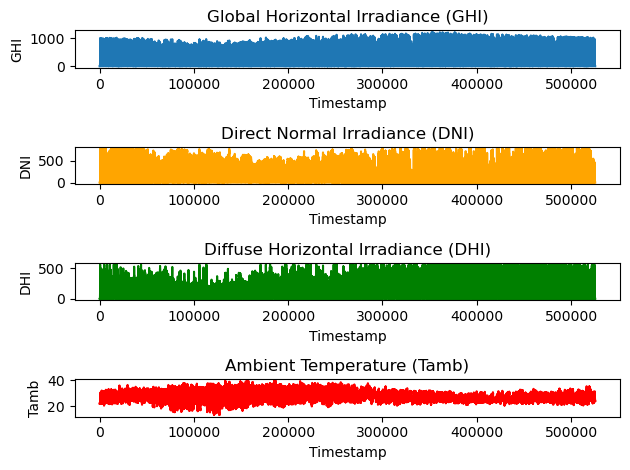

In [17]:

def plot_time_series(daf):

 df.set_index('Timestamp', inplace=True)
 print(df['Timestamp'])
 plt.figure(figsize=(12, 8))

# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance (GHI)')
plt.xlabel('Timestamp')
plt.ylabel('GHI')

# Plot DNI
plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.title('Direct Normal Irradiance (DNI)')
plt.xlabel('Timestamp')
plt.ylabel('DNI')

# Plot DHI
plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Timestamp')
plt.ylabel('DHI')

# Plot Tamb
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Ambient Temperature (Tamb)')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')

plt.tight_layout()
plt.show()

In [18]:

columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
df_corr = df[columns_of_interest]
corr_matrix = df_corr.corr()
print(corr_matrix)


            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.864811  0.866136  0.924415  0.913334
DNI    0.864811  1.000000  0.531701  0.814707  0.806664
DHI    0.866136  0.531701  1.000000  0.809133  0.807853
TModA  0.924415  0.814707  0.809133  1.000000  0.993172
TModB  0.913334  0.806664  0.807853  0.993172  1.000000


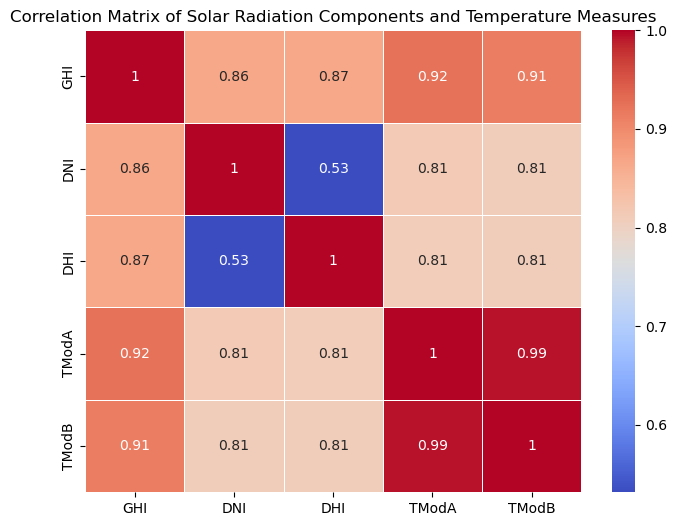

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.show()


In [20]:

wind_columns = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
df_wind = df[wind_columns]

print(df_wind.describe())



                  WS         WSgust        WSstdev             WD  \
count  522919.000000  522919.000000  522919.000000  522919.000000   
mean        1.131858       1.671877       0.360558     132.661442   
std         1.194658       1.555052       0.286451     114.271348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.800000       1.600000       0.400000     160.500000   
75%         2.000000       2.600000       0.600000     233.900000   
max         4.600000       6.200000       1.100000     360.000000   

             WDstdev  
count  522919.000000  
mean        7.066137  
std         7.200133  
min         0.000000  
25%         0.000000  
50%         6.200000  
75%        12.000000  
max        29.600000  


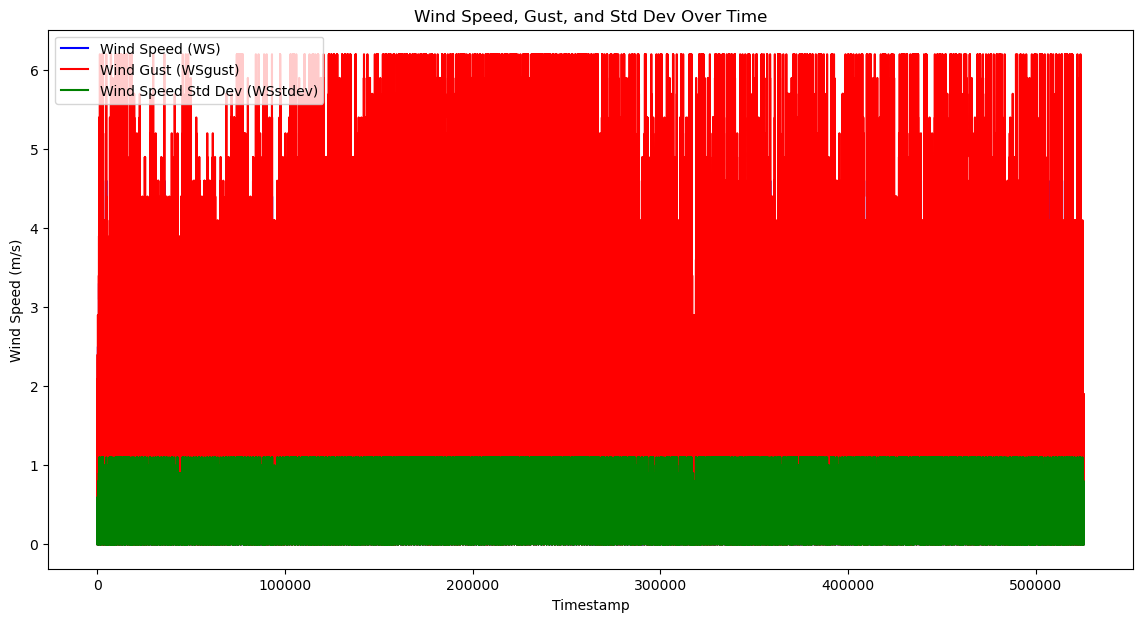

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['WS'], label='Wind Speed (WS)', color='blue')
plt.plot(df.index, df['WSgust'], label='Wind Gust (WSgust)', color='red')
plt.plot(df.index, df['WSstdev'], label='Wind Speed Std Dev (WSstdev)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed, Gust, and Std Dev Over Time')
plt.legend()
plt.show()


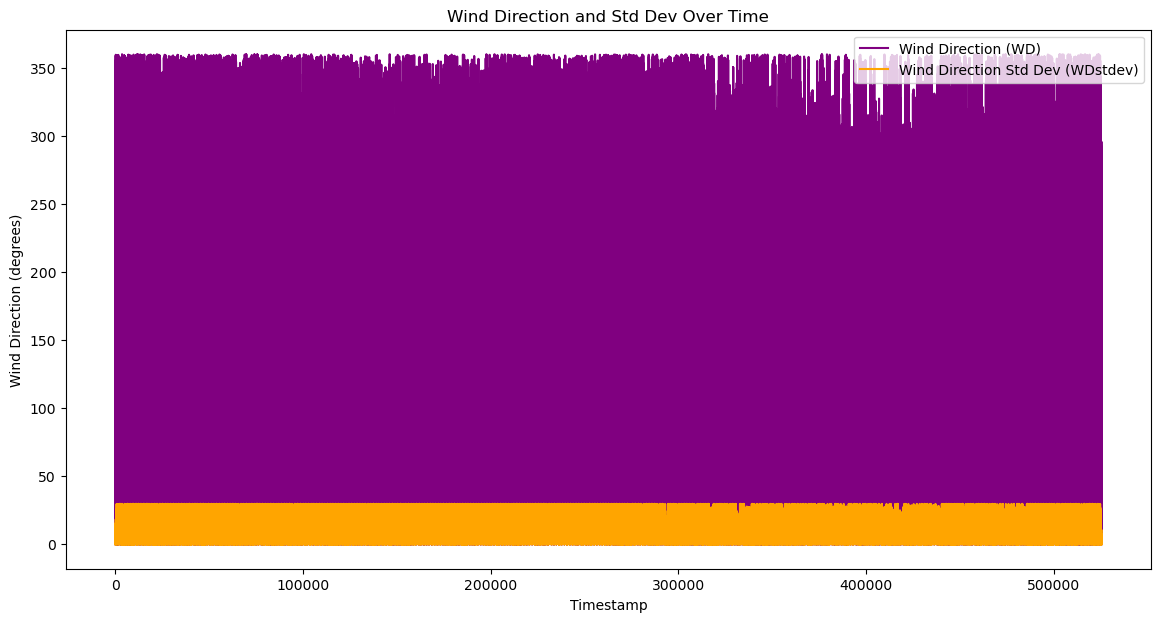

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['WD'], label='Wind Direction (WD)', color='purple')
plt.plot(df.index, df['WDstdev'], label='Wind Direction Std Dev (WDstdev)', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (degrees)')
plt.title('Wind Direction and Std Dev Over Time')
plt.legend()
plt.show()


               WS    WSgust   WSstdev        WD   WDstdev
WS       1.000000  0.973326  0.726497  0.587152  0.685669
WSgust   0.973326  1.000000  0.838404  0.652541  0.743952
WSstdev  0.726497  0.838404  1.000000  0.713750  0.755605
WD       0.587152  0.652541  0.713750  1.000000  0.611665
WDstdev  0.685669  0.743952  0.755605  0.611665  1.000000


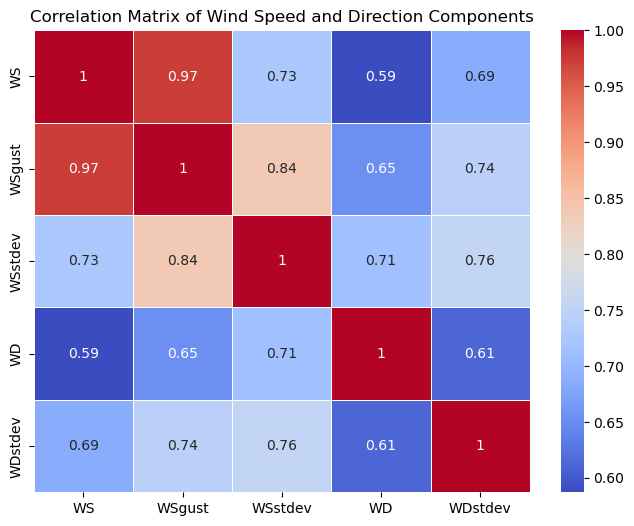

In [23]:
wind_corr_matrix = df_wind.corr()
print(wind_corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(wind_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wind Speed and Direction Components')
plt.show()


In [24]:

temperature_columns = ['Tamb', 'TModA', 'TModB']
df_temp = df[temperature_columns]
print(df_temp.describe())


                Tamb          TModA          TModB
count  522919.000000  522919.000000  522919.000000
mean       26.306368      32.391280      32.488548
std         4.394953      12.331827      11.920183
min        13.100000      11.100000      11.400000
25%        23.100000      23.500000      23.800000
50%        25.200000      26.500000      26.800000
75%        29.400000      40.600000      41.000000
max        39.500000      69.400000      67.500000


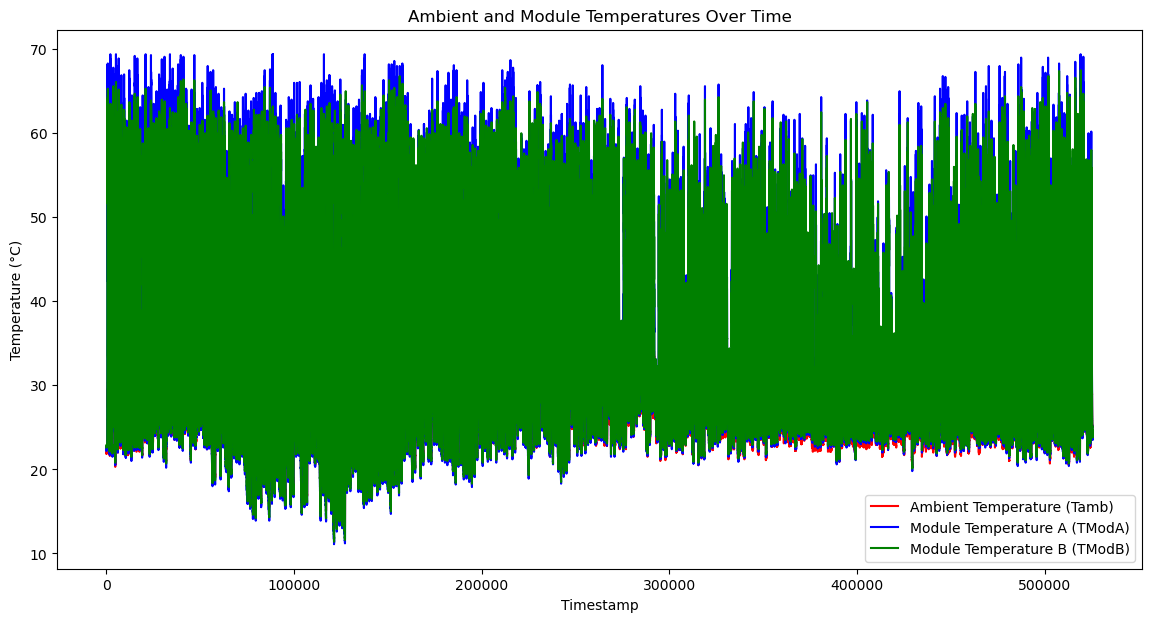

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Tamb'], label='Ambient Temperature (Tamb)', color='red')
plt.plot(df.index, df['TModA'], label='Module Temperature A (TModA)', color='blue')
plt.plot(df.index, df['TModB'], label='Module Temperature B (TModB)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Ambient and Module Temperatures Over Time')
plt.legend()
plt.show()


C:\Users\teeyob\AppData\Local\Temp\ipykernel_19680\2469855960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['TModA_Tamb_diff'] = df['TModA'] - df['Tamb']
C:\Users\teeyob\AppData\Local\Temp\ipykernel_19680\2469855960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['TModB_Tamb_diff'] = df['TModB'] - df['Tamb']


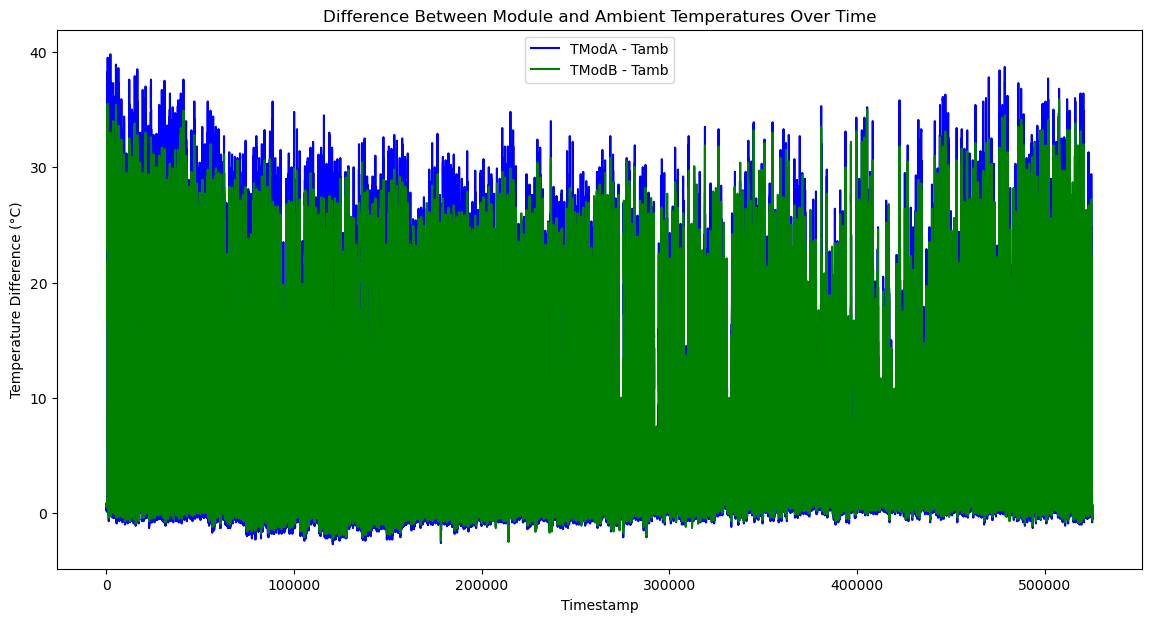

In [26]:
df_temp['TModA_Tamb_diff'] = df['TModA'] - df['Tamb']
df_temp['TModB_Tamb_diff'] = df['TModB'] - df['Tamb']

plt.figure(figsize=(14, 7))
plt.plot(df.index, df_temp['TModA_Tamb_diff'], label='TModA - Tamb', color='blue')
plt.plot(df.index, df_temp['TModB_Tamb_diff'], label='TModB - Tamb', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Temperature Difference (°C)')
plt.title('Difference Between Module and Ambient Temperatures Over Time')
plt.legend()
plt.show()


Visualize the correlation matrix
                     Tamb     TModA     TModB  TModA_Tamb_diff  \
Tamb             1.000000  0.833791  0.856922         0.654093   
TModA            0.833791  1.000000  0.993172         0.962978   
TModB            0.856922  0.993172  1.000000         0.942328   
TModA_Tamb_diff  0.654093  0.962978  0.942328         1.000000   
TModB_Tamb_diff  0.687675  0.965902  0.963507         0.987608   

                 TModB_Tamb_diff  
Tamb                    0.687675  
TModA                   0.965902  
TModB                   0.963507  
TModA_Tamb_diff         0.987608  
TModB_Tamb_diff         1.000000  


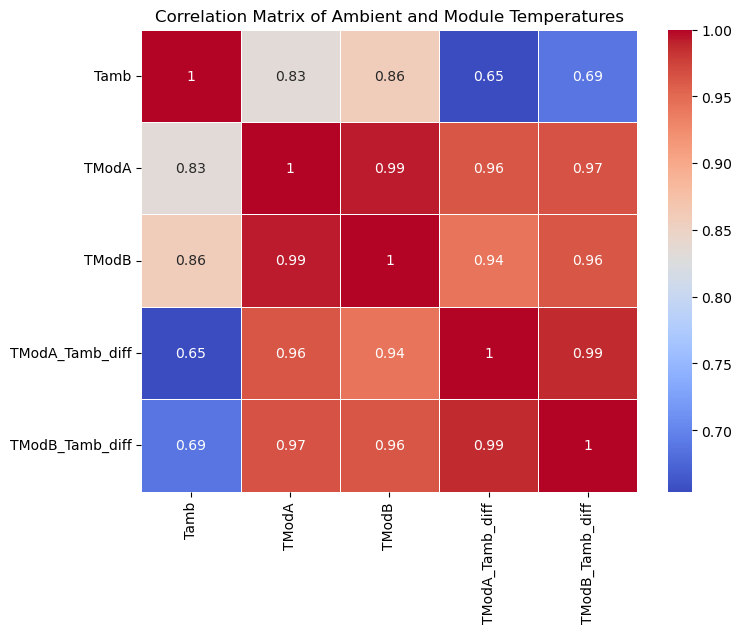

In [27]:
temp_corr_matrix = df_temp.corr()
print("Visualize the correlation matrix")
print(temp_corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(temp_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Ambient and Module Temperatures')
plt.show()


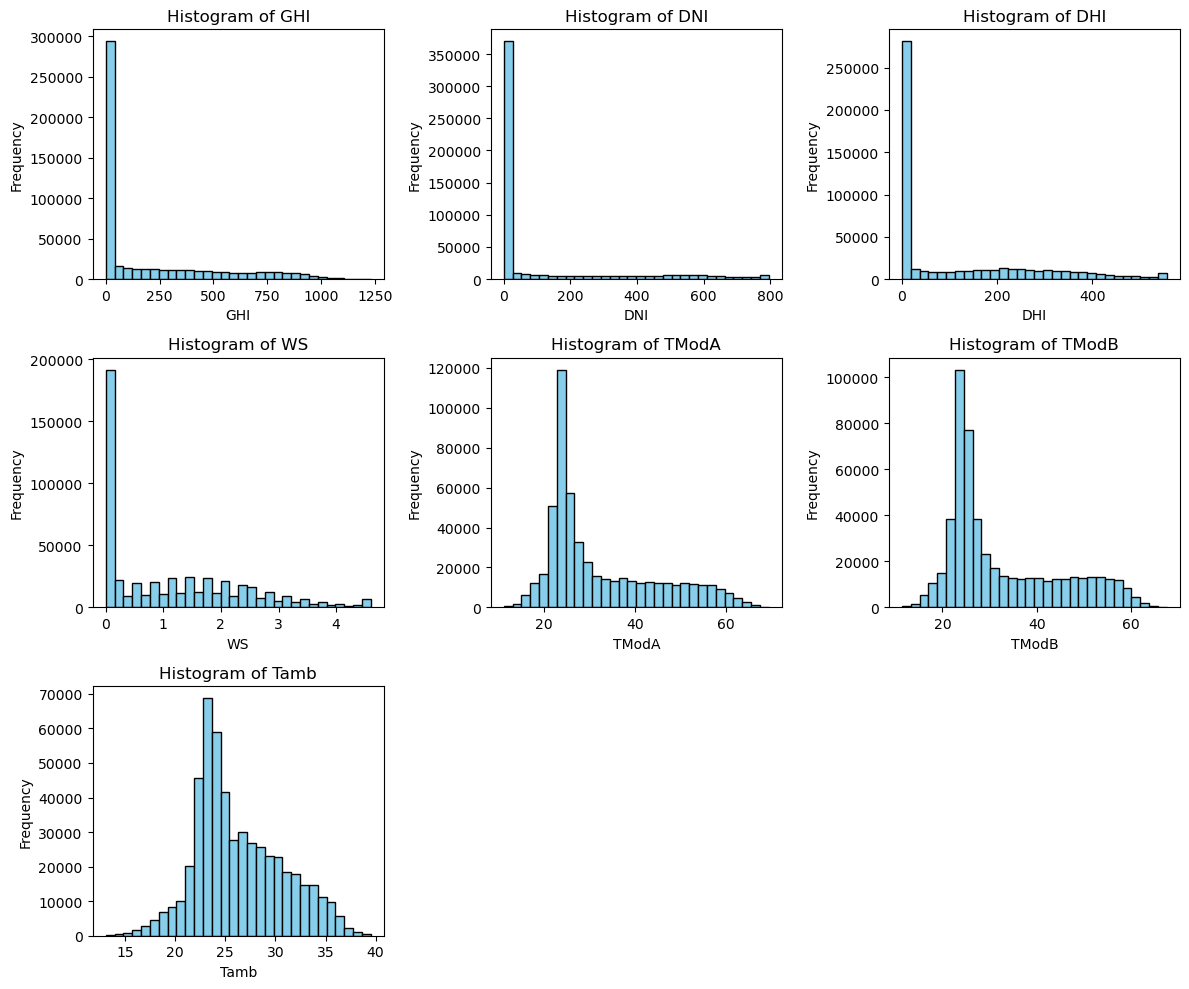

In [28]:


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Comments'], errors='ignore')
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i+1)  
    df[column].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


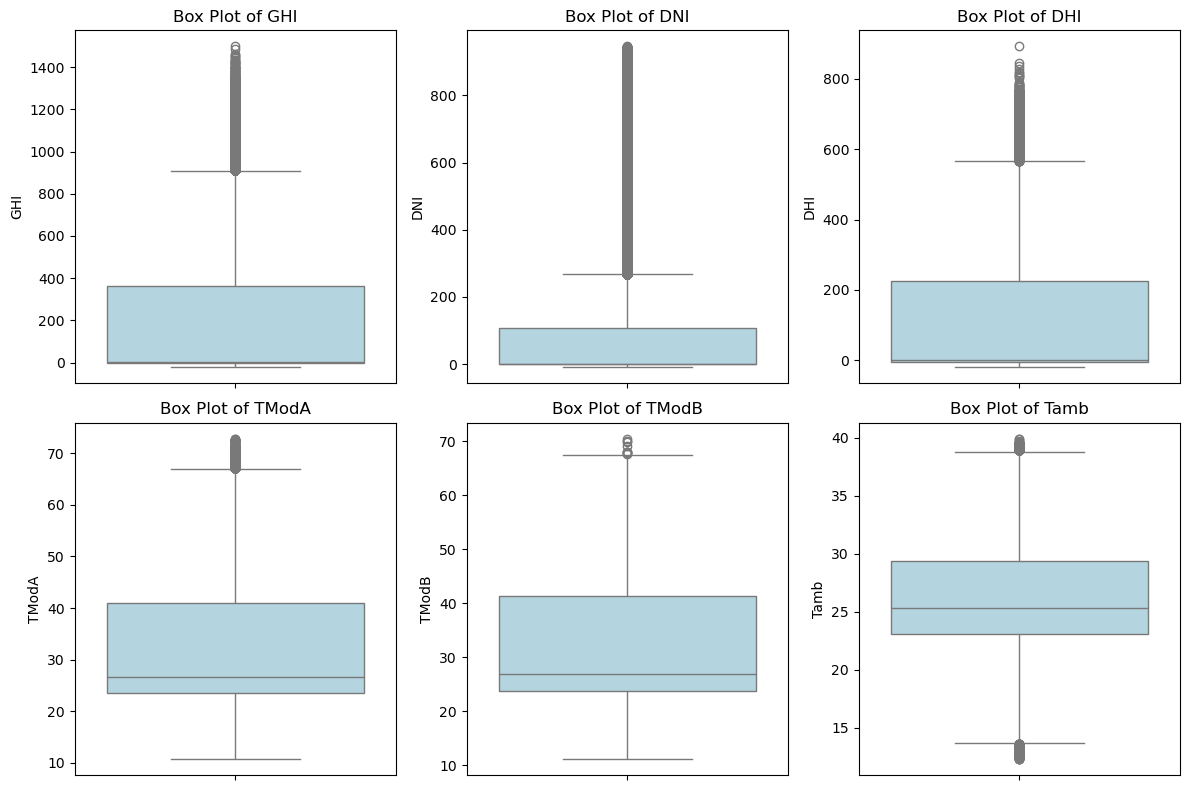

In [29]:




data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Comments'], errors='ignore')
columns_to_plot = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb']
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(y=df[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


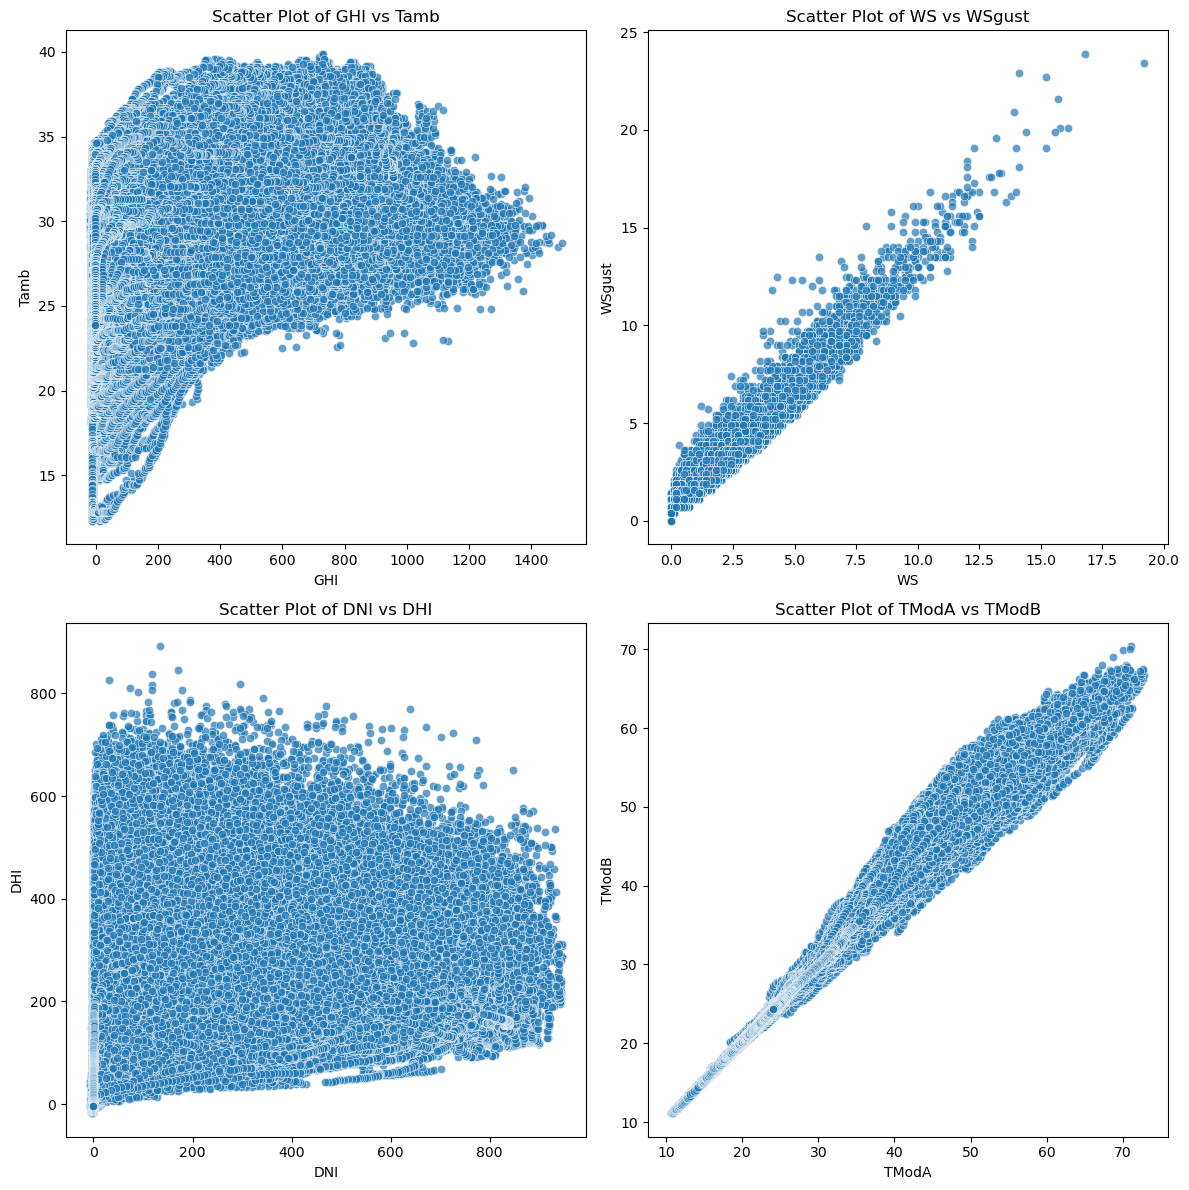

In [30]:

data = pd.read_csv(file_path)
df = pd.DataFrame(data)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Comments'], errors='ignore')
scatter_pairs = [
    ('GHI', 'Tamb'),  
    ('WS', 'WSgust'), 
    ('DNI', 'DHI'),   
    ('TModA', 'TModB')
]
plt.figure(figsize=(12, 12))
for i, (x_var, y_var) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i+1) 
    sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.7)
    plt.title(f'Scatter Plot of {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()
